# **Práctica 2**

En esta práctica vamos a ver como podríamos trabajar con redes neuronales totalmente conectadas en imagen. Veremos cuales son las limitaciones de emplear este tipo de arquitecturas para trabajar con imágenes.


En primer lugar vamos a trabajar con el dataset MNIST para clasificación de imágenes de dígitos numéricos. Para ello seguiremos los siguientes pasos:



1.   Descargaremos las imágenes y las visualizaremos
2.   Pre-procesaremos los datos.
3.   Diseñaremos la arquitectura.
4.   Entrenaremos la red.
5.   Evaluaremos el modelo entrenado.



# 1. Descaga de las imágenes y visualización

In [ ]:
# Importamos la base de datos de las propias de keras
from tensorflow.keras.datasets import mnist

# Descargamos el dataset diferenciando entre conjunto de entrenamiento y validación/test
(X_train, y_train), (X_testval, y_testval) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Analizamos la base de datos descargada
# Tamaño de las imágenes y número de muestras
print("Tamaño imágenes entrenamiento: ", X_train.shape)
print("Tamaño etiquetas entrenamiento: ", y_train.shape)
print("Tamaño imágenes validación/test: ", X_testval.shape)
print("Tamaño etiquetas validación/test: ", y_testval.shape)

Tamaño imágenes entrenamiento:  (60000, 28, 28)
Tamaño etiquetas entrenamiento:  (60000,)
Tamaño imágenes validación/test:  (10000, 28, 28)
Tamaño etiquetas validación/test:  (10000,)


In [ ]:
# Tipo de datos
print("Tipo datos imágenes entrenamiento: ", X_train.dtype)
print("Tipo datos etiquetas entrenamiento: ", y_train.dtype)
print("Tipo datos imágenes validación/test: ", X_testval.dtype)
print("Tipo datos etiquetas validación/test: ", y_testval.dtype)

Tipo datos imágenes entrenamiento:  uint8
Tipo datos etiquetas entrenamiento:  uint8
Tipo datos imágenes validación/test:  uint8
Tipo datos etiquetas validación/test:  uint8


In [ ]:
# Rango de valores de las imágenes
print("Valor mínimo imágenes entrenamiento: ", X_train.min())
print("Valor máximo imágenes entrenamiento: ", X_train.max())
print("Valor mínimo imágenes validación/test: ", X_testval.min())
print("Valor máximo imágenes validación/test: ", X_testval.max())

Valor mínimo imágenes entrenamiento:  0
Valor máximo imágenes entrenamiento:  255
Valor mínimo imágenes validación/test:  0
Valor máximo imágenes validación/test:  255


In [ ]:
# Etiquetas de las particiones
import numpy as np

print("Etiquetas entrenamiento: ", np.unique(y_train))
print("Etiquetas validación/test: ", np.unique(y_testval))

Etiquetas entrenamiento:  [0 1 2 3 4 5 6 7 8 9]
Etiquetas validación/test:  [0 1 2 3 4 5 6 7 8 9]


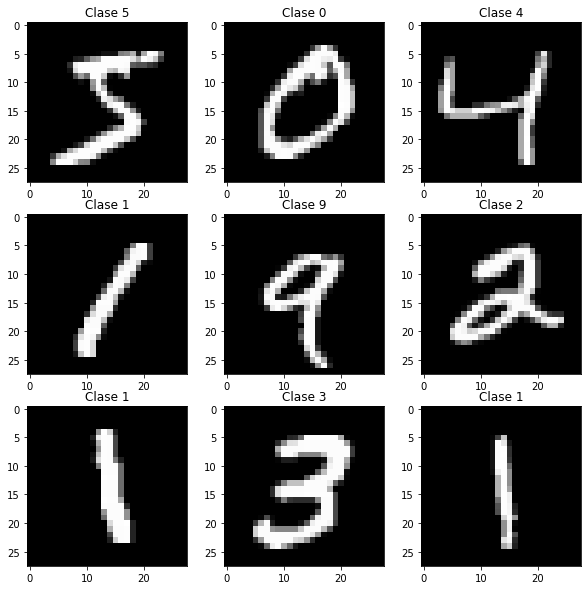

In [ ]:
# Visualización de las imágenes
import matplotlib.pyplot as plt
# Configuramos tamaño de las imágenes para una correcta visualización
plt.rcParams['figure.figsize'] = (10, 10)
# Mostramos 9 imágenes con su etiqueta correspondiente
for i in range(9):  #representamos las primeras 9 imágenes
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f'Clase {y_train[i]}')

# 2. Pre-proceso de los datos

In [ ]:
# Para trabajar con redes neuronales totalmente conectadas no podemos trabajar con matrices 2D, debemos convertir la imagen a vector 1D
# EN REDES CONVOLUNCIONALES (CNN) NO SE HACE. SE TRABAJA DIRECTAMENTE CON IMÁGENES.
X_train_vector = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_testval_vector = X_testval.reshape(X_testval.shape[0], X_testval.shape[1]*X_testval.shape[2])
print("Nuevo tamaño datos entrenamiento: ", X_train_vector.shape)
print("Nuevo tamaño datos validación/test: ", X_testval_vector.shape)

Nuevo tamaño datos entrenamiento:  (60000, 784)
Nuevo tamaño datos validación/test:  (10000, 784)


In [ ]:
# Las redes neuronales trabajan mejor con valores entre 0-1. Por lo que vamos a convertir el rango

# Primero convertimos las imágenes a float
X_train_vector = X_train_vector.astype('float32')
X_testval_vector = X_testval_vector.astype('float32')
print('Tipo datos entrenamiento: ', X_train_vector.dtype)
print('Tipo datos validación/test: ', X_testval_vector.dtype)

Tipo datos entrenamiento:  float32
Tipo datos validación/test:  float32


In [ ]:
# Cambiamos rango de las imágenes   ((CAMBIAMOS EL RANGO ENTRE 0 .. 255   A   RANGO ENTRE  0 .. 1 ))
X_train_vector /= 255
X_testval_vector /= 255
print("Rango datos entrenamiento: [", X_train_vector.min(), ', ', X_train_vector.max(), ']')
print("Rango datos validación/test: [", X_testval_vector.min(), ', ', X_testval_vector.max(), ']')

Rango datos entrenamiento: [ 0.0 ,  1.0 ]
Rango datos validación/test: [ 0.0 ,  1.0 ]


In [ ]:
# Convertimos etiquetas a codificación one-hot    ((PARA LAS SALIDAS))
from tensorflow.keras.utils import to_categorical
num_clases = len(np.unique(y_train))
y_train_cod = to_categorical(y_train, num_clases)
y_testval_cod = to_categorical(y_testval, num_clases)

In [ ]:
print("Tamaño etiquetas entrenamiento: ", y_train_cod.shape)
print("Tamaño etiquetas validación/test: ", y_testval_cod.shape)

Tamaño etiquetas entrenamiento:  (60000, 10)
Tamaño etiquetas validación/test:  (10000, 10)


In [ ]:
# Dividimos conjunto de datos de validación/test en 2 subconjuntos   (VALIDACIÓN Y TEST)
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_vector[:samples_test_nb]
y_val = y_testval_cod[:samples_test_nb]
X_test = X_testval_vector[samples_test_nb:]
y_test = y_testval_cod[samples_test_nb:]

print("Muestras validación: ", X_val.shape)
print("Muestras test: ", X_test.shape)

Muestras validación:  (5000, 784)
Muestras test:  (5000, 784)


# 3. Diseñamos la arquitectura


In [ ]:
# Importamos dependencias
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Definimos la arquitectura  ((totalmente conectada))
# Definimos arquitectura
input_layer = Input(shape=(X_train_vector.shape[1],))   # capa de entrada con ((el número de pixeles de mi vector (784)))
hidden_layer = Dense(32, activation="relu")(input_layer)  # capa oculta con 32 neuronas, función de activación "relu"
output_layer = Dense(num_clases, activation="softmax")(hidden_layer)  # salida tantas neuronas como número de clases tenemos

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilamos el modelo
model.compile(loss="categorical_crossentropy", optimizer="adam",    #compilamos el modelo, con el optimizador y las métricas.
              metrics=["accuracy"])

# 4. Entrenamiento de un modelo

In [ ]:
history = model.fit(X_train_vector, y_train_cod, epochs=20, batch_size=128,     # es un problema sencillo y funciona bien desde el principio.
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.5310 - accuracy: 0.8501 - val_loss: 0.3261 - val_accuracy: 0.9082
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2428 - accuracy: 0.9315 - val_loss: 0.2742 - val_accuracy: 0.9184
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2003 - accuracy: 0.9427 - val_loss: 0.2344 - val_accuracy: 0.9312
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1721 - accuracy: 0.9503 - val_loss: 0.2143 - val_accuracy: 0.9354
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1529 - accuracy: 0.9557 - val_loss: 0.1980 - val_accuracy: 0.9408
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1387 - accuracy: 0.9599 - val_loss: 0.1829 - val_accuracy: 0.9418
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1265 - accuracy: 0.9635 - val_loss: 0.1753 - val_accuracy: 0.9444
Epoch 

Cosas a observar:

Métricas entrenamiento    98%

Métricas validacón    96%

¿Sobreajuste?    (NO hay sobreajuste. Tiene que haber una diferencia más significativa entre entrenamiento y validación).

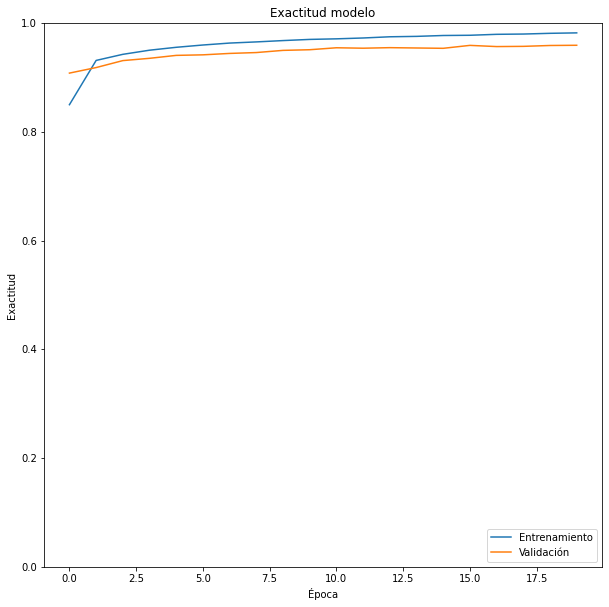

In [ ]:
# Visualizamos la exactitud
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.ylim(0,1)
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

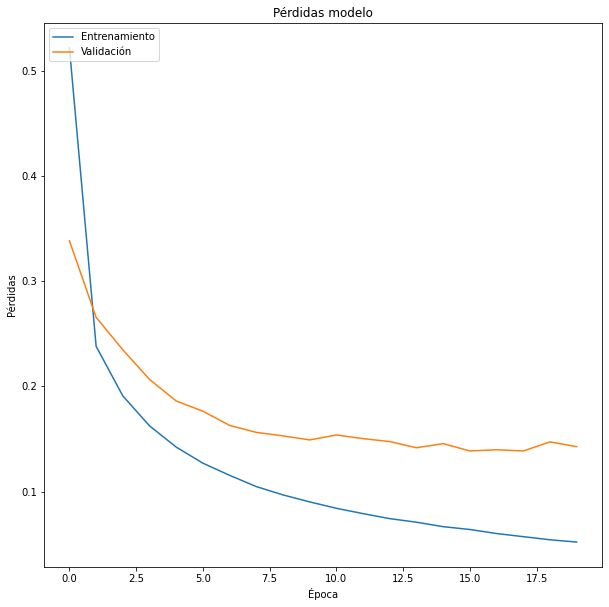

In [ ]:
# Visualizamos pérdidas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdidas modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="upper left")
plt.show()

In [ ]:
# Guardamos el modelo         IMPORTANTE GUARDARNOS EL MODELO.  Para luego guardar los pesos y utilizarlo.
from pathlib import Path
path_modelos = Path('./modelos')
path_modelos.mkdir(exist_ok=True)
model.save(path_modelos / 'model_mnist.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mv ./modelos/model_mnist.h5 './drive/MyDrive/Colab Notebooks/21-22/modelos'

# 5. Evaluamos el modelo

In [ ]:
# Sacamos métricas sobre nuestro conjunto de test. Utilizo en desarrollo "model.evaluate" para ver cómo funciona en test.
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Exactitud test: ", metrics[1])

Precision test:  0.9787999987602234


In [ ]:
# Obtenemos predicciones.  Utilizo "model.predict" en producción, porque no conozco la clase real.
prediccion = model.predict(X_test)
# Cogemos la clase con mayor probabilidad
prediccion = np.argmax(prediccion, axis=1)

In [ ]:
# Deshacemos codificación one-hot en conjunto de test.  ((deshacemos la codificación de test para hacer la visualización))
y_test_clases = np.argmax(y_test, axis=1)

In [ ]:
# Detectamos imágenes correctamente clasificadas
correct_index = np.nonzero(prediccion == y_test_clases)[0]

In [ ]:
# Detectamos imágenes incorrectamente clasificadas
incorrect_index = np.nonzero(prediccion != y_test_clases)[0]

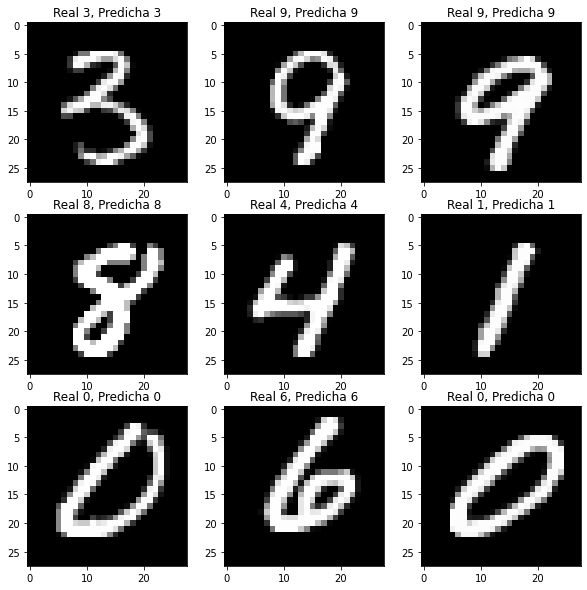

In [ ]:
# Mostramos imágenes correctamente clasificadas
plt.figure()
for i, correct in enumerate(correct_index[:9]):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title(f'Real {y_test_clases[correct]}, Predicha {prediccion[correct]}')

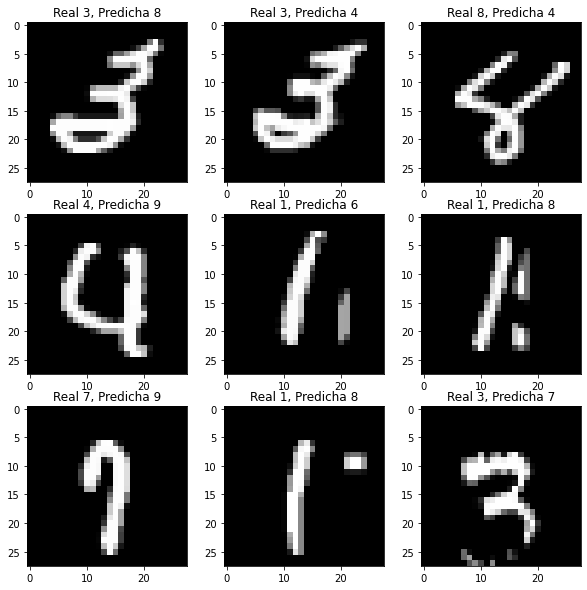

In [ ]:
# Mostramos imágenes incorrectamente clasificadas    ((SON LAS QUE ME INTERESAN REALEMENTE))
plt.figure()  # Imágenes "reguleras". El problema de utilizar una arquitectura que NO utiliza la relación entre los píxeles. Está todo puesto en un vector y no están relacionados.
for i, incorrect in enumerate(incorrect_index[:9]):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title(f'Real {y_test_clases[incorrect]}, Predicha {prediccion[incorrect]}')

# Ejercicio 1: Probamos diferentes funciones de activación

//Las ventajas de utilizar las funciones de activación es que NO aumentamos complejidad pero mejoramos resultados.

Analizamos cómo afecta el uso de diferentes funciones de activación en la capa oculta. Probamos las siguientes:

*   Sin función de activación -> hidden_layer = Dense(32, activation=None)(input_layer)
*   Sigmoid
*   Tanh
*   Relu




Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4987 - accuracy: 0.8592 - val_loss: 0.3802 - val_accuracy: 0.8894
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2987 - accuracy: 0.9151 - val_loss: 0.3542 - val_accuracy: 0.9008
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.9210 - val_loss: 0.3547 - val_accuracy: 0.8988
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.9244 - val_loss: 0.3444 - val_accuracy: 0.9032
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2655 - accuracy: 0.9261 - val_loss: 0.3445 - val_accuracy: 0.9044
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2619 - accuracy: 0.9276 - val_loss: 0.3368 - val_accuracy: 0.9038
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9281 - val_loss: 0.3434 - val_accuracy: 0.9030
Epoch 

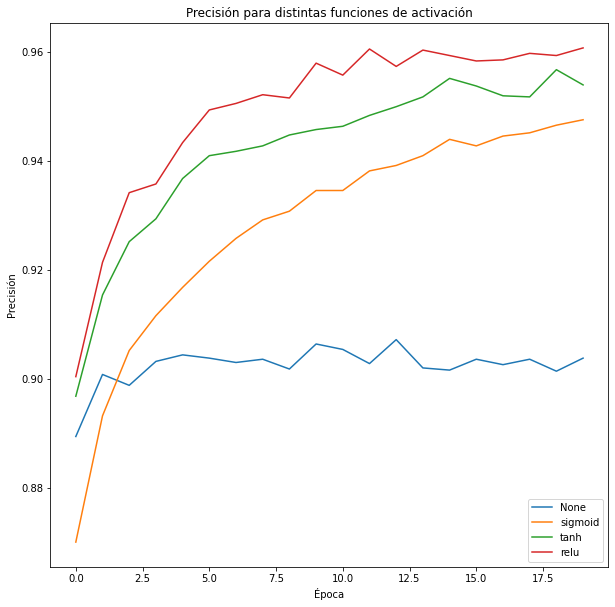

In [ ]:
for activation in [None, 'sigmoid', 'tanh', 'relu']:      #Ojo con poner 'None', para no poner función se ponen None
  input_layer = Input(shape=(X_train_vector.shape[1],))
  hidden_layer = Dense(32, activation=activation)(input_layer)
  output_layer = Dense(num_clases, activation="softmax")(hidden_layer)

  model = Model(inputs=input_layer, outputs=output_layer)

  model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
  
  history_activation = model.fit(X_train_vector, y_train_cod, epochs=20, 
                                 batch_size=128, validation_data=(X_val, y_val))
  
  plt.plot(history_activation.history['val_accuracy'])

plt.title('Exactitud para distintas funciones de activación')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='lower right')

# Ejercicio 2: Creamos un modelo más complejo
Para aumentar la complejidad del modelo añadimos una capa oculta de 512 neuronas

In [ ]:
# Definimos arquitectura
input_layer = Input(shape=(X_train_vector.shape[1],))
hidden_layer = Dense(512, activation="relu")(input_layer)
hidden_layer_2 = Dense(32, activation="relu")(hidden_layer)
output_layer = Dense(10, activation="softmax")(hidden_layer_2)

model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 32)                16416     
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilamos el modelo
model_2.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Entenamos el modelo
history_2 = model_2.fit(X_train_vector, y_train_cod, epochs=20, batch_size=128, 
                        validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2699 - accuracy: 0.9208 - val_loss: 0.1484 - val_accuracy: 0.9550
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1017 - accuracy: 0.9702 - val_loss: 0.1294 - val_accuracy: 0.9612
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.1135 - val_accuracy: 0.9644
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0934 - val_accuracy: 0.9706
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.1008 - val_accuracy: 0.9692
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0960 - val_accuracy: 0.9722
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 

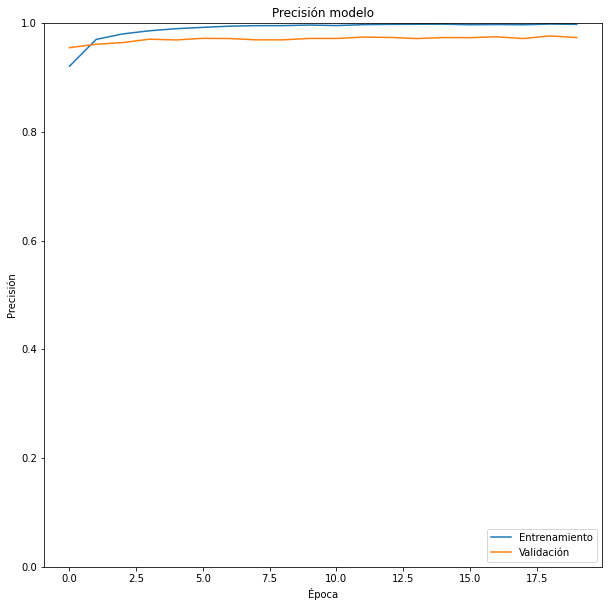

In [ ]:
# Visualizamos la exactitud
import matplotlib.pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Exactitud modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.ylim(0,1)
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

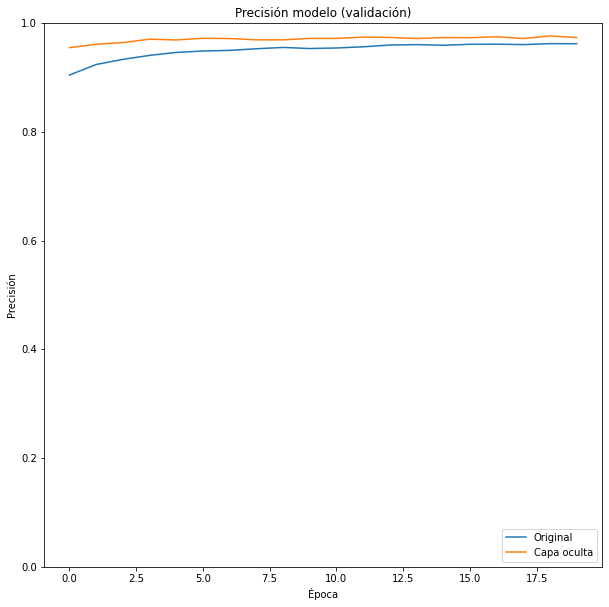

In [ ]:
# Comparamos la exactitud en validación
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Exactitud modelo (validación)')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.ylim(0,1)
plt.legend(['Original', 'Capa oculta'], loc="lower right")
plt.show()

In [ ]:
# Sacamos métricas test    ## AUMENTANDO LA COMPLEJIDAD, MEJORAMOS RESULTADOS.  (casi 99)
metrics_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Exactitud test prev: ", metrics[1])
print("Exactitud test: ", metrics_2[1])

Precisión test prev:  0.9787999987602234
Precisión test:  0.9890000224113464


# Ejercicio 3: Entrenamos un modelo con la base de datos CIFAR10

In [ ]:
from keras.datasets import cifar10

(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# Tamaño datos
print("Tamaño imágenes entrenamiento: ", X_train.shape)       #IMAGENES CON 3 CANALES, con colores. FILAS x COLUMNAS x 3.  32x32x3  (RGB)
print("Tamaño etiquetas entrenamiento: ", y_train.shape)
print("Tamaño imágenes validación/test: ", X_testval.shape)
print("Tamaño etiquetas validación/test: ", y_testval.shape)

# Tipo de datos
print("Tipo datos imágenes entrenamiento: ", X_train.dtype)
print("Tipo datos etiquetas entrenamiento: ", y_train.dtype)
print("Tipo datos imágenes validación/test: ", X_testval.dtype)
print("Tipo datos etiquetas validación/test: ", y_testval.dtype)

# Rango datos
print("Valor mínimo imágenes entrenamiento: ", X_train.min())
print("Valor máximo imágenes entrenamiento: ", X_train.max())
print("Valor mínimo imágenes validación/test: ", X_testval.min())
print("Valor máximo imágenes validación/test: ", X_testval.max())

#Etiquetas
print("Etiquetas entrenamiento: ", np.unique(y_train))
print("Etiquetas validación/test: ", np.unique(y_testval))

Tamaño imágenes entrenamiento:  (50000, 32, 32, 3)
Tamaño etiquetas entrenamiento:  (50000, 1)
Tamaño imágenes validación/test:  (10000, 32, 32, 3)
Tamaño etiquetas validación/test:  (10000, 1)
Tipo datos imágenes entrenamiento:  uint8
Tipo datos etiquetas entrenamiento:  uint8
Tipo datos imágenes validación/test:  uint8
Tipo datos etiquetas validación/test:  uint8
Valor mínimo imágenes entrenamiento:  0
Valor máximo imágenes entrenamiento:  255
Valor mínimo imágenes validación/test:  0
Valor máximo imágenes validación/test:  255
Etiquetas entrenamiento:  [0 1 2 3 4 5 6 7 8 9]
Etiquetas validación/test:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Clases reales     ((número de etiquetas de entrenamiento, 10, las ponemos en texto para tenerlas más claras))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
           'horse', "ship", "truck"]

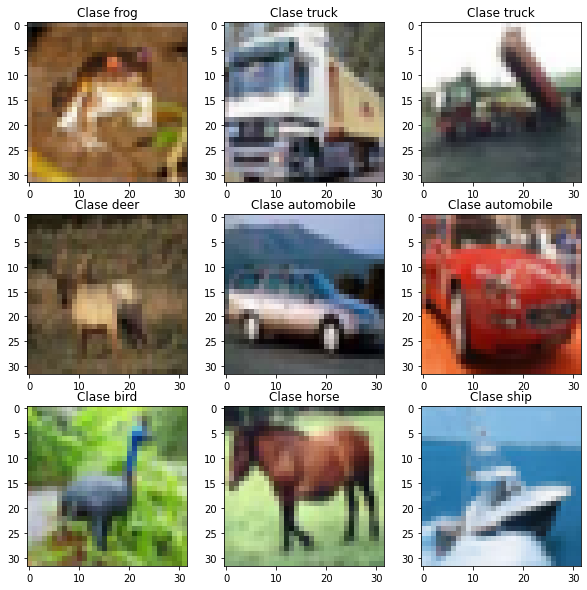

In [ ]:
# Visualización de las imágenes           PROBLEMA SON IMÁGENES MUY PEQUEÑITAS RESOLUCIÓN (32X32) DIFICULTA EL PROBLEMA A SIMPLE VISTA.
import matplotlib.pyplot as plt
# Configuramos tamaño de las imágenes para una correcta visualización
plt.rcParams['figure.figsize'] = (10, 10)
# Mostramos 9 imágenes con su etiqueta correspondiente
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i])
  plt.title(f'Clase {classes[int(y_train[i])]}')

In [ ]:
# Para trabajar con redes neuronales totalmente conectadas no podemos trabajar con matrices 2D, debemos convertir la imagen a vector 1D
X_train_vector = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_testval_vector = X_testval.reshape(X_testval.shape[0], X_testval.shape[1]*X_testval.shape[2]*X_testval.shape[3])
print("Nuevo tamaño datos entrenamiento: ", X_train_vector.shape)
print("Nuevo tamaño datos validación/test: ", X_testval_vector.shape)         # 5000 Y  5000

Nuevo tamaño datos entrenamiento:  (50000, 3072)
Nuevo tamaño datos validación/test:  (10000, 3072)


In [ ]:
# Convertimos rango imágenes a 0-1
X_train_vector = X_train_vector.astype('float32')
X_testval_vector = X_testval_vector.astype('float32')
X_train_vector /= 255
X_testval_vector /= 255
print(X_train_vector.min(), X_train_vector.max())
print(X_testval_vector.min(), X_testval_vector.max())

0.0 1.0
0.0 1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Convertimos etiquetas a codificación one-hot    ((otra forma de hacerlo. La anterior es más fácil))
onehot_enc = OneHotEncoder()
y_train_cod = onehot_enc.fit_transform(y_train).toarray()
y_testval_cod = onehot_enc.fit_transform(y_testval).toarray()
print("Tamaño etiquetas entrenamiento: ", y_train_cod.shape)
print("Tamaño etiquetas validación/test: ", y_testval_cod.shape)

Tamaño etiquetas entrenamiento:  (50000, 10)
Tamaño etiquetas validación/test:  (10000, 10)


In [ ]:
# Dividimos conjunto de datos de validación/test en 2 subconjuntos    ((32x32x3  =  3072))
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_vector[:samples_test_nb]
y_val = y_testval_cod[:samples_test_nb]
X_test = X_testval_vector[samples_test_nb:]
y_test = y_testval_cod[samples_test_nb:]

print("Muestras validación: ", X_val.shape)
print("Muestras test: ", X_test.shape)

Muestras validación:  (5000, 3072)
Muestras test:  (5000, 3072)


In [ ]:
# Definimos arquitectura
input_layer = Input(shape=(X_train_vector.shape[1],))
hidden_layer = Dense(128, activation="relu")(input_layer)
hidden_layer_2 = Dense(256, activation="relu")(hidden_layer)
hidden_layer_3 = Dense(256, activation="relu")(hidden_layer_2)
output_layer = Dense(10, activation="softmax")(hidden_layer_3)

model_3 = Model(inputs=input_layer, outputs=output_layer)
model_3.summary()

# Compilamos el modelo
model_3.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_17 (Dense)            (None, 128)               393344    
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 494,730
Trainable params: 494,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entenamos el modelo
history_cifar = model_3.fit(X_train_vector, y_train_cod, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 4s 10ms/step - loss: 1.8666 - accuracy: 0.3241 - val_loss: 1.7318 - val_accuracy: 0.3780
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.6705 - accuracy: 0.4011 - val_loss: 1.5958 - val_accuracy: 0.4280
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5787 - accuracy: 0.4340 - val_loss: 1.5331 - val_accuracy: 0.4442
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.5209 - accuracy: 0.4571 - val_loss: 1.5166 - val_accuracy: 0.4552
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 1.4739 - accuracy: 0.4724 - val_loss: 1.5750 - val_accuracy: 0.4514
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 1.4435 - accuracy: 0.4853 - val_loss: 1.4780 - val_accuracy: 0.4724
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 1.4072 - accuracy: 0.4948 - val_loss: 1.4771 - val_accuracy: 0.4806
E

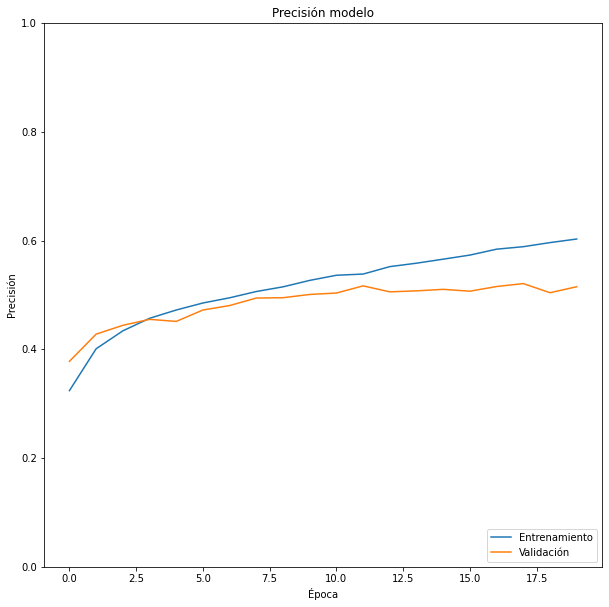

In [ ]:
#la red se ha quedado en el 50%. NO consigue adaptarse ni llegar a nada.

# Visualizamos la exactitud
import matplotlib.pyplot as plt
plt.plot(history_cifar.history['accuracy'])
plt.plot(history_cifar.history['val_accuracy'])
plt.title('Exactitud modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.ylim(0,1)
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

In [ ]:
# Sacamos métricas test
metrics_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Exactitud test: ", metrics_3[1])

Precisión test:  0.4918000102043152


In [ ]:
# Obtenemos predicciones 
prediccion = model_3.predict(X_test)
# Cogemos la clase con mayor probabilidad
prediccion = np.argmax(prediccion, axis=1)

y_test_clases = np.argmax(y_test, axis=1)

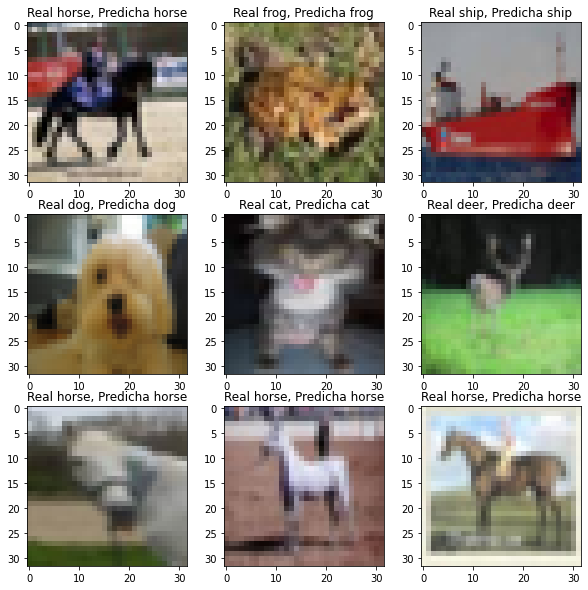

In [ ]:
correct_index = np.nonzero(prediccion == y_test_clases)[0]

plt.figure()
for i, correct in enumerate(correct_index[:9]):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[correct].reshape(32,32,3))
  plt.title(f'Real {classes[int(y_test_clases[correct])]}, Predicha {classes[int(prediccion[correct])]}')

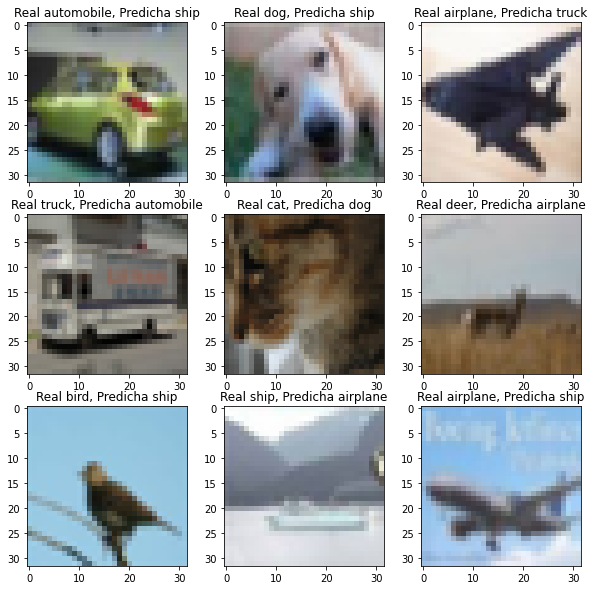

In [ ]:
incorrect_index = np.nonzero(prediccion != y_test_clases)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_index[9:18]):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[incorrect].reshape(32,32,3))
  plt.title(f'Real {classes[int(y_test_clases[incorrect])]}, Predicha {classes[int(prediccion[incorrect])]}')

# Ejecicio 3: Convertimos imagen a escala de grises

Pasar de RGB a escala de grises

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

X_train_gray = np.zeros(shape=(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_testval_gray = np.zeros(shape=(X_testval.shape[0], X_testval.shape[1], X_testval.shape[2]))

for i in range(X_train.shape[0]):
  X_train_gray[i, :, :] = rgb2gray(X_train[i, :, :, :])

for i in range(X_testval.shape[0]):
  X_testval_gray[i, :, :] = rgb2gray(X_testval[i, :, :, :])

print('Tamaño X_train_gray: ', X_train_gray.shape)
print('Tamaño X_testval_gray: ', X_testval_gray.shape)

Tamaño X_train_gray:  (50000, 32, 32)
Tamaño X_testval_gray:  (10000, 32, 32)


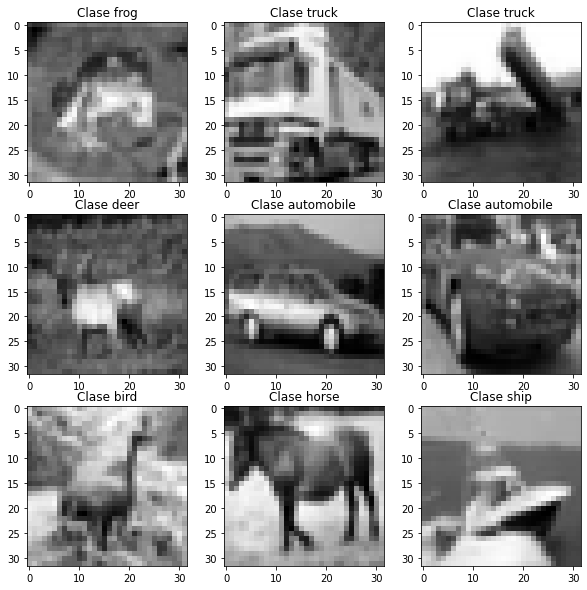

In [ ]:
# Mostramos 9 imágenes con su etiqueta correspondiente
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train_gray[i], cmap='gray')
  plt.title(f'Clase {classes[int(y_train[i])]}')

In [ ]:
X_train_gray_vector = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1]*X_train_gray.shape[2])
X_testval_gray_vector = X_testval_gray.reshape(X_testval_gray.shape[0], X_testval_gray.shape[1]*X_testval_gray.shape[2])
print("Nuevo tamaño datos entrenamiento: ", X_train_gray_vector.shape)
print("Nuevo tamaño datos validación/test: ", X_testval_gray_vector.shape)

Nuevo tamaño datos entrenamiento:  (50000, 1024)
Nuevo tamaño datos validación/test:  (10000, 1024)


In [ ]:
# Convertimos rango imágenes a 0-1
print('Rango antes entrenamiento: ', X_train_gray_vector.min(), X_train_gray_vector.max())
print('Rango antes validación/test: ', X_testval_gray_vector.min(), X_testval_gray_vector.max())

X_train_gray_vector = X_train_gray_vector.astype('float32')
X_testval_gray_vector = X_testval_gray_vector.astype('float32')
X_train_gray_vector /= 255
X_testval_gray_vector /= 255

print('Rango despues entrenamiento: ', X_train_gray_vector.min(), X_train_gray_vector.max())
print('Rango despues validación/test: ', X_testval_gray_vector.min(), X_testval_gray_vector.max())

Rango antes entrenamiento:  0.0 254.97449999999998
Rango antes validación/test:  0.0 254.97449999999998
Rango despues entrenamiento:  0.0 0.9999
Rango despues validación/test:  0.0 0.9999


In [ ]:
# Dividimos conjunto de datos de validación/test en 2 subconjuntos
X_val_gray = X_testval_gray_vector[:samples_test_nb]
X_test_gray = X_testval_gray_vector[samples_test_nb:]

print("Muestras validación: ", X_val_gray.shape)
print("Muestras test: ", X_test_gray.shape)

Muestras validación:  (5000, 1024)
Muestras test:  (5000, 1024)


In [ ]:
# Definimos arquitectura
input_layer = Input(shape=(X_train_gray_vector.shape[1],))
hidden_layer = Dense(512, activation="relu")(input_layer)
hidden_layer_2 = Dense(512, activation="relu")(hidden_layer)
hidden_layer_3 = Dense(32, activation="relu")(hidden_layer_2)
output_layer = Dense(10, activation="softmax")(hidden_layer_3)

model_4 = Model(inputs=input_layer, outputs=output_layer)
model_4.summary()

# Compilamos el modelo
model_4.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 32)                16416     
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 804,202
Trainable params: 804,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entenamos el modelo
history_cifar_gray = model_4.fit(X_train_gray_vector, y_train_cod, epochs=20, batch_size=128,
                    validation_data=(X_val_gray, y_val))

Epoch 1/20
391/391 [==============================] - 6s 14ms/step - loss: 2.1821 - accuracy: 0.1795 - val_loss: 2.0849 - val_accuracy: 0.2098
Epoch 2/20
391/391 [==============================] - 5s 14ms/step - loss: 1.9998 - accuracy: 0.2629 - val_loss: 1.9531 - val_accuracy: 0.2936
Epoch 3/20
391/391 [==============================] - 7s 18ms/step - loss: 1.9001 - accuracy: 0.3103 - val_loss: 1.8488 - val_accuracy: 0.3460
Epoch 4/20
391/391 [==============================] - 9s 23ms/step - loss: 1.8295 - accuracy: 0.3443 - val_loss: 1.8136 - val_accuracy: 0.3610
Epoch 5/20
391/391 [==============================] - 6s 14ms/step - loss: 1.7749 - accuracy: 0.3664 - val_loss: 1.7665 - val_accuracy: 0.3760
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 1.7341 - accuracy: 0.3806 - val_loss: 1.7206 - val_accuracy: 0.3910
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 1.6990 - accuracy: 0.3936 - val_loss: 1.7007 - val_accuracy: 0.3992

Los resultados son aún peor.
La limitación si queremos trabajar con imágenes con redes totalmente conectadas si dificultamos el problema. (Limitadas).